#UNDERSTANDING THE PROBLEM STATEMENT AND BUSINESS CASE

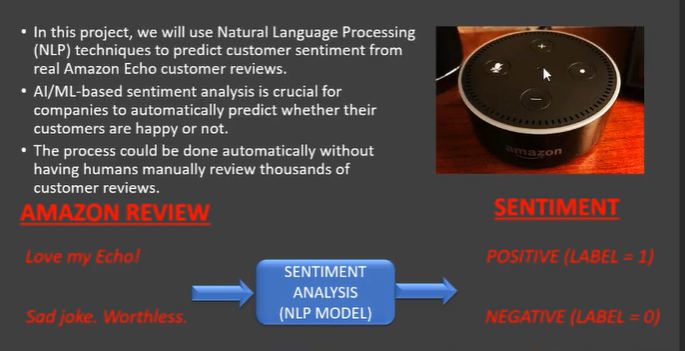

data source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/kernels

# IMPORTING LIBRARIES AND DATASETS

In [65]:
!pip install jupyterthemes

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
import string
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [67]:
# Load the data
data=pd.read_csv("/content/amazon_reviews.csv")
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [68]:
# View the DataFrame Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [69]:
# View DataFrame Statistical Summary
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [70]:
data=data.drop(["date"],axis=1)
data

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


# DATA VISUALIZATION

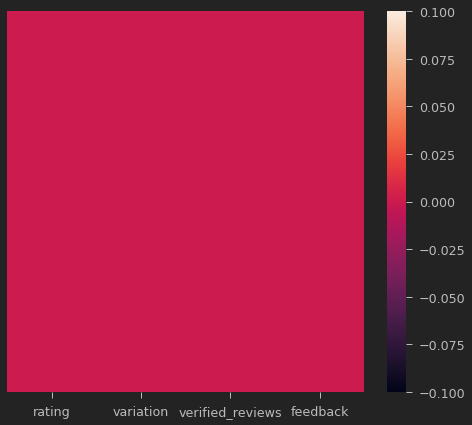

In [71]:
sns.heatmap(data.isnull(),yticklabels=False)

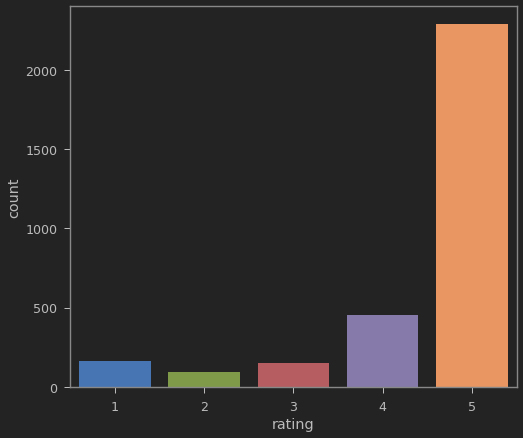

In [72]:
# Plot the count plot for the ratings
sns.countplot(x=data["rating"])

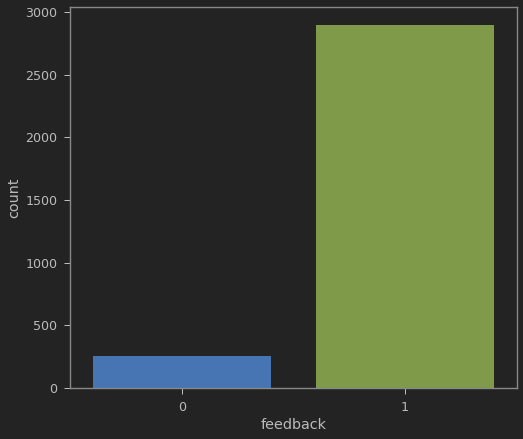

In [73]:
# Plot the count plot for the feedback
sns.countplot(x=data["feedback"])

# DATA EXPLORATION

In [74]:
# Let's get the length of the verified_reviews column
data["length"]=data["verified_reviews"].apply(len)

In [75]:
data

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


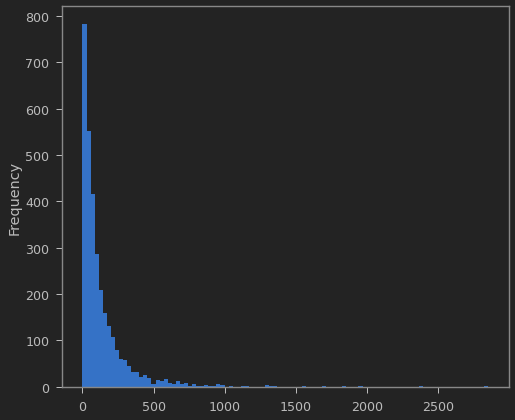

In [76]:
# Plot the histogram for the length
data["length"].plot(bins=100,kind="hist")

In [77]:
# Apply the describe method to get statistical summary
data.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [78]:
data[data["length"]==int(np.mean(data["length"].values))]

,rating,variation,verified_reviews,feedback,length
570,4,Black,Nice. It works good.Some times is not easy to ...,1,132
1655,5,White Show,awesome product! I am in the process of having...,1,132
1705,3,Black Show,"If you belong to amazon prime, I would think t...",1,132
2321,4,Configuration: Fire TV Stick,I expected to have access to more current movi...,1,132
2483,4,White Dot,Works good for the most part. You ask it some ...,1,132
2834,4,White Dot,Works good for the most part. You ask it some ...,1,132


# PLOTTING THE WORDCLOUD

In [79]:
# Obtain only the positive reviews
pos=data[data["feedback"]==1]
pos

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


In [80]:
# Obtain the negative reviews only
neg=data[data["feedback"]==0]
neg

,rating,variation,verified_reviews,feedback,length
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,Charcoal Fabric,Not much features.,0,18
162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...
3047,1,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,Black Dot,The only negative we have on this product is t...,0,240
3091,1,Black Dot,I didn’t order it,0,17


In [81]:
import nltk # Natural Language tool kit 

In [112]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
# Convert to list format
sentences=pos["verified_reviews"].tolist()
len(sentences)

2893

In [84]:
# Join all reviews into one large string
sentences_as_one_string=" ".join(sentences)

In [85]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [86]:
from nltk.corpus import stopwords
import nltk
nltk.download()
nltk.download("punkt")

from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
def remove_punc_and_stopwords(text):
  Test_pinc_removed=[char for char in text if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_pinc_removed)

  sentences =nltk.sent_tokenize(Test_punc_removed_join)
  lemmatizer=WordNetLemmatizer()


  for i in range(len(sentences)):
    words=nltk.word_tokenize(sentences[i])
    words=[lemmatizer.lemmatize(word) for word in words if word.lower() not in stopwords.words('english')]
    sentences[i]=" ".join(words)


  return " ".join(sentences)

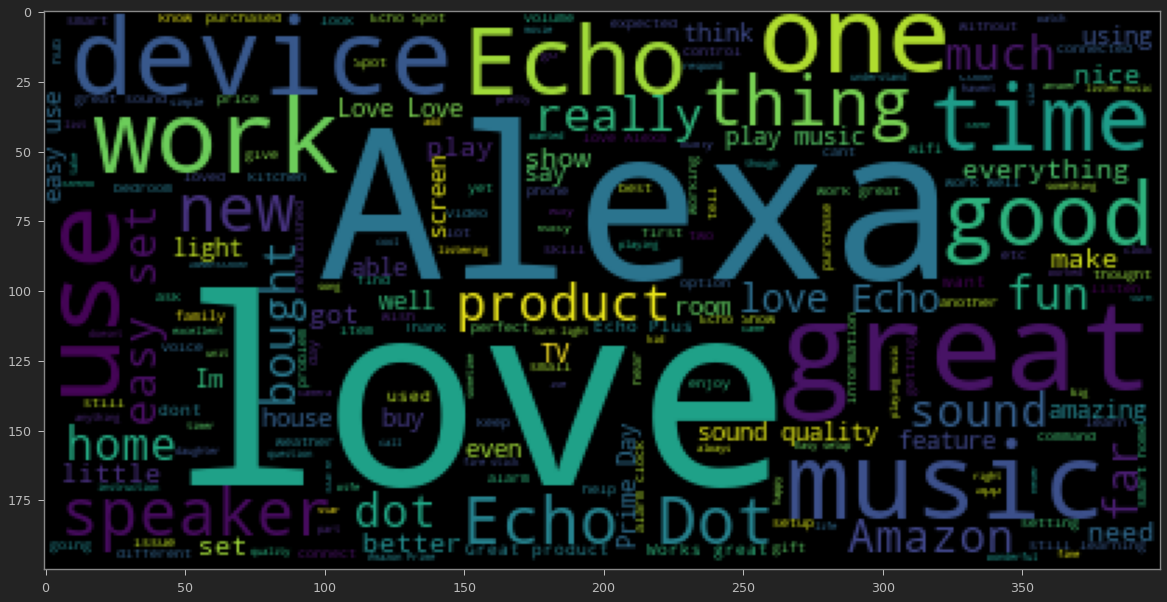

In [88]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(remove_punc_and_stopwords(sentences_as_one_string)))

In [89]:
# Convert to list format
sentences=neg["verified_reviews"].tolist()
len(sentences)

257

In [90]:
# Join all reviews into one large string
sentences_as_one_string=" ".join(sentences)

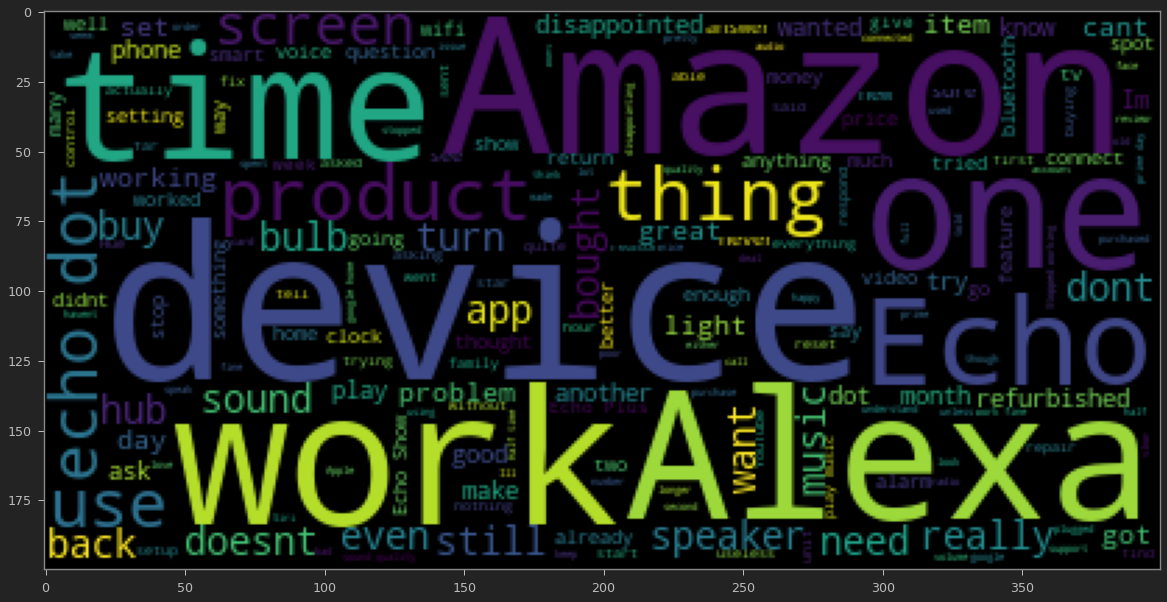

In [91]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(remove_punc_and_stopwords(sentences_as_one_string)))

# PERFORMING COUNT VECTORIZATION (TOKENIZATION)

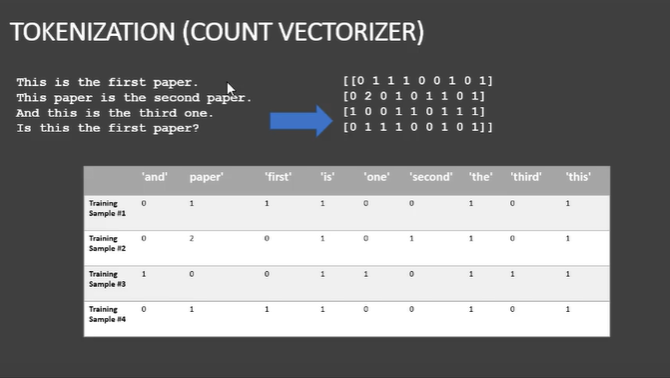

In [92]:
# Let's test the newly added function
reviews_df_clean = data['verified_reviews'].apply(remove_punc_and_stopwords)

In [93]:
# show the original review
print(data['verified_reviews'][5]) 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [94]:
# show the cleaned up version
print(reviews_df_clean[5])

received echo gift needed another Bluetooth something play music easily accessible found smart speaker ’ wait see else


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer()
reviews_countvectorizer = vectorizer.fit_transform(data['verified_reviews'])
reviews_countvectorizer

<3150x4044 sparse matrix of type '<class 'numpy.int64'>'
	with 60852 stored elements in Compressed Sparse Row format>

In [96]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [97]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [98]:
reviews_countvectorizer.shape

(3150, 4044)

In [99]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [100]:
X = reviews

In [101]:
X

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
y = data['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

**MINI CHALLENGE #7:**
- **What is the shape of X and Y**

In [103]:
X.shape

(3150, 4044)

In [104]:
y.shape

(3150,)

# TRAIN AND TEST NAIVE BAYES CLASSIFIER MODEL

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

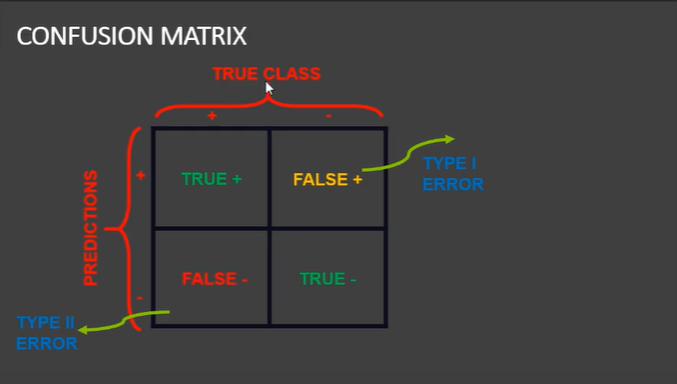

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
from sklearn.naive_bayes import MultinomialNB

NBclassifier=MultinomialNB()
NBclassifier.fit(X_train,y_train)


MultinomialNB()

[[  9  38]
 [  5 578]]


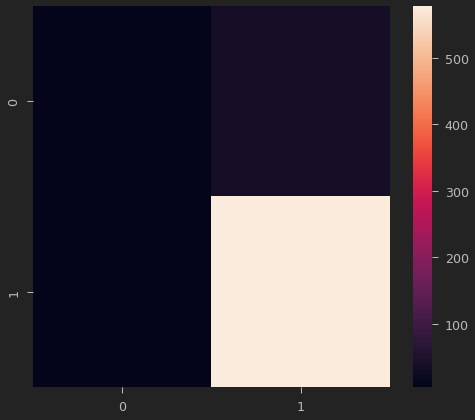

In [111]:
# Predicting the Test set results
y_predict=NBclassifier.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm)

**MINI CHALLENGE #8:**
- **Train a logistic Regression classifier and assess its performance**

[[ 13  34]
 [  8 575]]


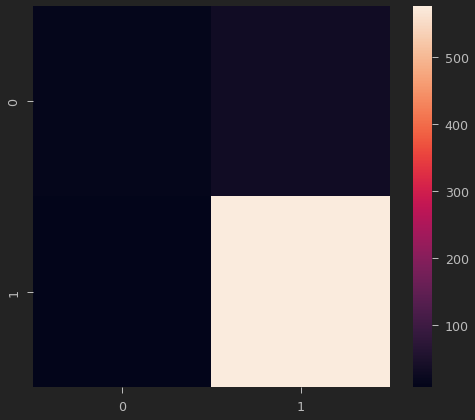

In [110]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm)